In [2]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Flatten, Input, Activation, BatchNormalization
from keras.utils import to_categorical
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


In [4]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
print("x_train's shape = " + str(x_train.shape))
print("x_test's shape = " + str(x_test.shape))
print("y_train's shape = " + str(y_train.shape))
print("y_test's shape = " + str(y_test.shape))

x_train's shape = (60000, 28, 28, 1)
x_test's shape = (10000, 28, 28, 1)
y_train's shape = (60000, 10)
y_test's shape = (10000, 10)


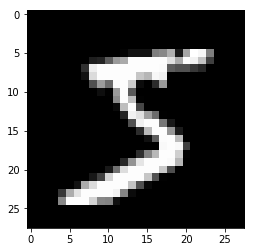

In [7]:
plt.imshow(x_train[0,:,:,0], cmap="gray")
plt.show()

In [8]:
def Dense_Model():
    inputs = Input((28,28,1, ))
    
    X = Flatten()(inputs)
    X = Dense(128, activation="tanh")(X)
    X = Dense(32, activation="tanh")(X)
    X = Dense(10, activation="softmax")(X)
    
    model = Model(inputs=inputs, outputs=X)
    return model

In [9]:
model = Dense_Model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=20, epochs=15, verbose=1, callbacks=[keras.callbacks.History()])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 15s 244us/step - loss: 0.6302 - acc: 0.8022 - val_loss: 0.5094 - val_acc: 0.8400
Epoch 2/15
60000/60000 [==============================] - 14s 229us/step - loss: 0.4559 - acc: 0.8548 - val_loss: 0.4336 - val_acc: 0.8611
Epoch 3/15
60000/60000 [==============================] - 13s 225us/step - loss: 0.4092 - acc: 0.8715 - val_loss: 0.3722 - val_acc: 0.8855
Epoch 4/15
60000/60000 [==============================] - 13s 224us/step - loss: 0.3689 - acc: 0.8839 - val_loss: 0.3452 - val_acc: 0.8928
Epoch 5/15
60000/60000 [==============================] - 13s 224us/step - loss: 0.3510 - acc: 0.8915 - val_loss: 0.3266 - val_acc: 0.8965
Epoch 6/15
60000/60000 [==============================] - 13s 224us/step - loss: 0.3419 - acc: 0.8936 - val_loss: 0.3188 - val_acc: 0.8985
Epoch 7/15
60000/60000 [==============================] - 14s 226us/step - loss: 0.3153 - acc: 0.9030 - val_loss: 0.

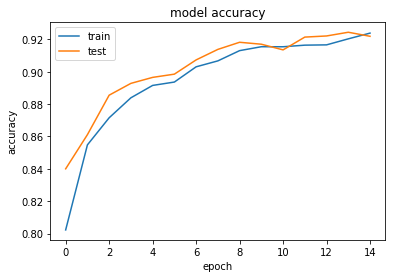

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

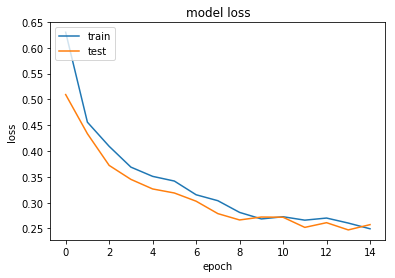

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
model.save("Models/Dense_Model.h5")